In [1]:
!ls ../experiments/logs

pcfg_2_2_128.yaml	 pcfg_3_2_128.yaml	  pcfg_3_2_4_right.yaml
pcfg_2_2_16.yaml	 pcfg_3_2_16_right.yaml   pcfg_3_2_4.yaml
pcfg_2_2_256.yaml	 pcfg_3_2_16.yaml	  pcfg_3_2_64_right.yaml
pcfg_2_2_64.yaml	 pcfg_3_2_256_right.yaml  pcfg_3_2_64.yaml
pcfg_3_2_128_right.yaml  pcfg_3_2_256.yaml


In [2]:
import glob
import os
import pandas as pd
import plotnine as p9

In [9]:
dfs = []
for file in glob.glob("../experiments/logs/**/ProbeEvaluator.csv") + glob.glob("../experiments/logs/**/SummaryEvaluator.csv"):
    print(file)
    evaluator = file.split("/")[-1].split(".")[0]
    splitted = os.path.dirname(file).split("/")[-1].split(".")[0].split("_")
    pos = "left"
    if len(splitted) == 5:
        _, layers, heads, dim, pos = splitted
    else:
        _, layers, heads, dim = splitted
    log = pd.read_csv(file)
    log["identifier"] = layers + "_" + heads + "_" + dim
    if layers.strip() != "3":
        continue
    log["layers"] = int(layers)
    log["heads"] = int(heads)
    log["dim"] = int(dim)
    log["evaluator"] = evaluator
    log["step_rel"] = log["step"] / log["step"].max()
    log["pos"] = pos
    log = log.groupby(["variable", "step", "layers", "heads", "dim", "evaluator", "step_rel", "identifier", "pos"]).mean().reset_index()
    dfs.append(log)
print(len(dfs))
df = pd.concat(dfs)
df = df.groupby(["variable", "step", "layers", "heads", "dim", "evaluator", "step_rel", "identifier", "pos"]).mean().reset_index()
df

../experiments/logs/pcfg_2_2_256.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_128.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_128_right.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_16_right.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_64_right.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_4.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_2_2_64.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_64.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_256.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_2_2_128.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_256_right.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_3_2_16.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_2_2_16.yaml/ProbeEvaluator.csv
../experiments/logs/pcfg_2_2_256.yaml/SummaryEvaluator.csv
../experiments/logs/pcfg_3_2_128.yaml/SummaryEvaluator.csv
../experiments/logs/pcfg_3_2_128_right.yaml/SummaryEvaluator.csv
../experiments/logs/pcfg_3_2_16_right.yaml/SummaryEvaluator.

,variable,step,layers,heads,dim,evaluator,step_rel,identifier,pos,value
0,0.CHILD.target_item.divider.acc,0,3,2,4,ProbeEvaluator,0.0000,3_2_4,left,0.072917
1,0.CHILD.target_item.divider.acc,0,3,2,16,ProbeEvaluator,0.0000,3_2_16,left,0.062500
2,0.CHILD.target_item.divider.acc,0,3,2,16,ProbeEvaluator,0.0000,3_2_16,right,0.030928
3,0.CHILD.target_item.divider.acc,0,3,2,64,ProbeEvaluator,0.0000,3_2_64,left,0.062500
4,0.CHILD.target_item.divider.acc,0,3,2,64,ProbeEvaluator,0.0000,3_2_64,right,0.041237
...,...,...,...,...,...,...,...,...,...,...
59314,query_type.pred_prob,380000,3,2,4,SummaryEvaluator,0.9500,3_2_4,left,0.045196
59315,query_type.pred_prob,385000,3,2,4,SummaryEvaluator,0.9625,3_2_4,left,0.043773
59316,query_type.pred_prob,390000,3,2,4,SummaryEvaluator,0.9750,3_2_4,left,0.044335
59317,query_type.pred_prob,395000,3,2,4,SummaryEvaluator,0.9875,3_2_4,left,0.046194


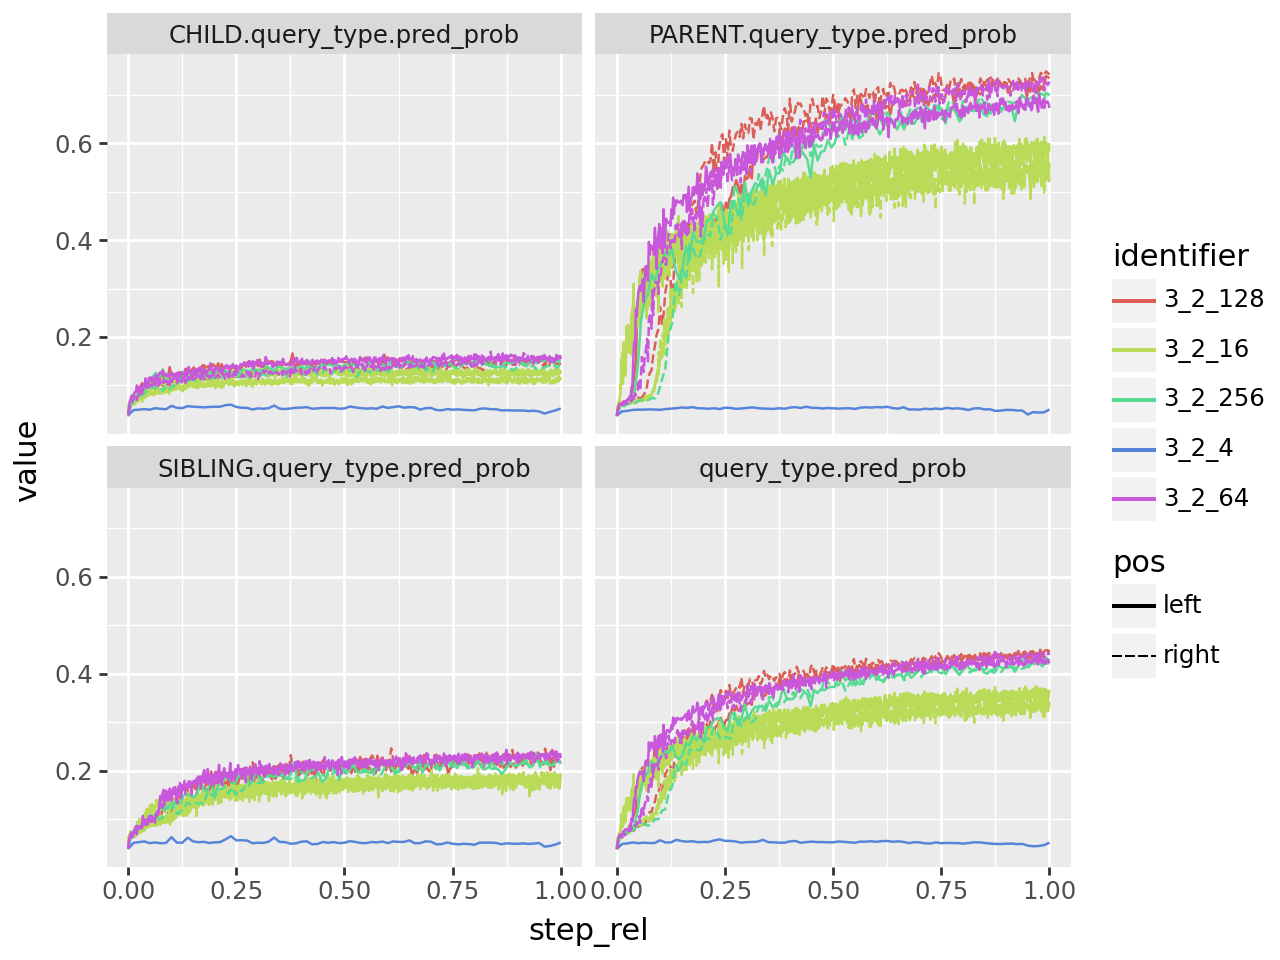

In [10]:
plot = (
    p9.ggplot(df[df["variable"].str.contains("pred_prob")], p9.aes(x="step_rel", y="value", color="identifier", linetype="pos")) +
    p9.geom_line() +
    p9.facet_wrap("~variable")
    # p9.scale_x_log10()
)
plot.show()

/juice2/scr2/aryaman/tinylang/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


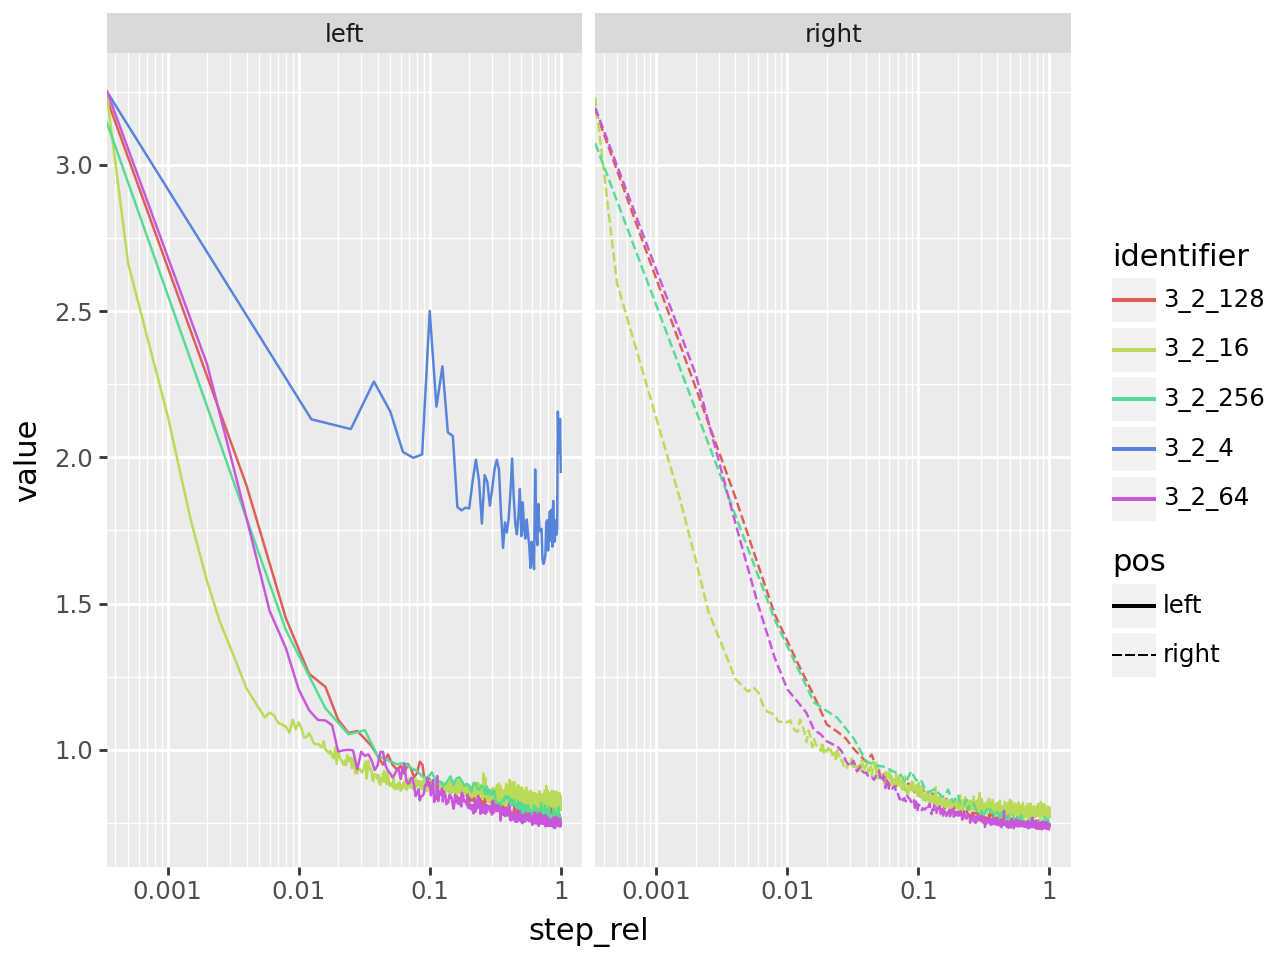

In [12]:
plot = (
    p9.ggplot(df[df["variable"] == "loss"], p9.aes(x="step_rel", y="value", color="identifier", linetype="pos")) +
    p9.geom_line() +
    p9.facet_wrap("~pos") +
    p9.scale_x_log10()
)
plot.show()

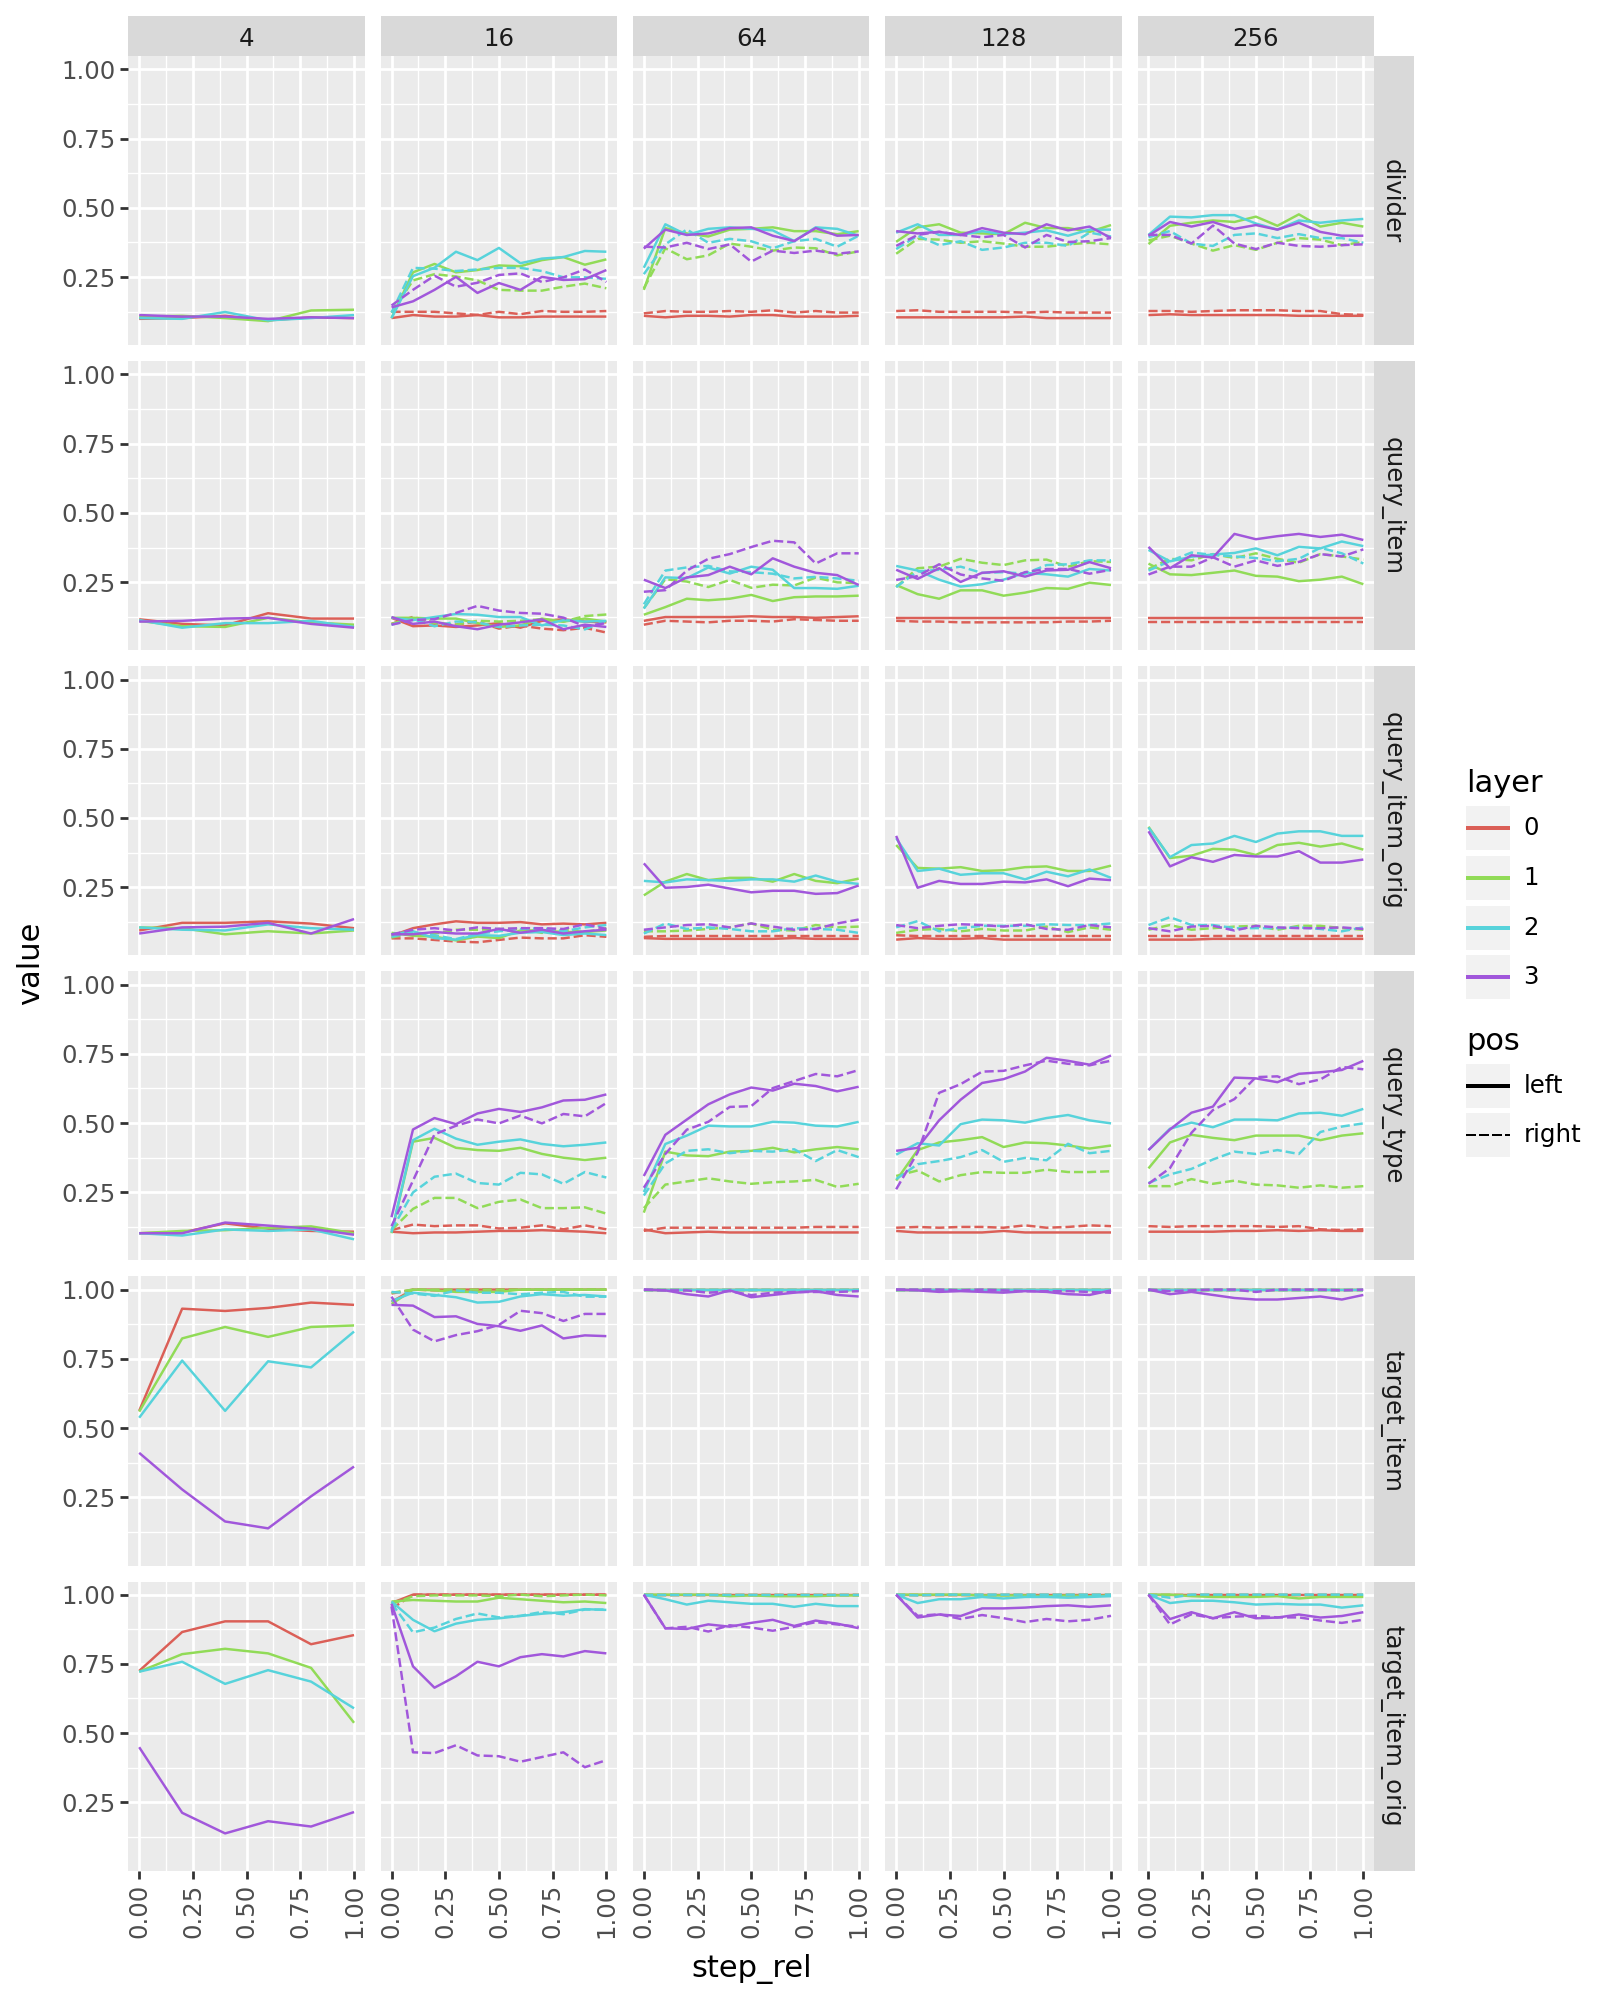

In [32]:
df_temp = df.copy()
df_temp = df_temp[df_temp["evaluator"] == "ProbeEvaluator"]
df_temp = df_temp[df_temp["layers"] == 3]
df_temp["layer"] = df_temp["variable"].str.split(".").str[0]
df_temp["type"] = df_temp["variable"].str.split(".").str[1]
df_temp["label_type"] = df_temp["variable"].str.split(".").str[2]
df_temp["query"] = df_temp["variable"].str.split(".").str[3]
df_temp
plot = (
    p9.ggplot(df_temp[df_temp["variable"].str.contains("PARENT")], p9.aes(x="step_rel", y="value", color="layer", linetype="pos")) +
    p9.geom_line() +
    p9.facet_grid("query~dim") +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5), figure_size=(8, 10))
)
plot.show()

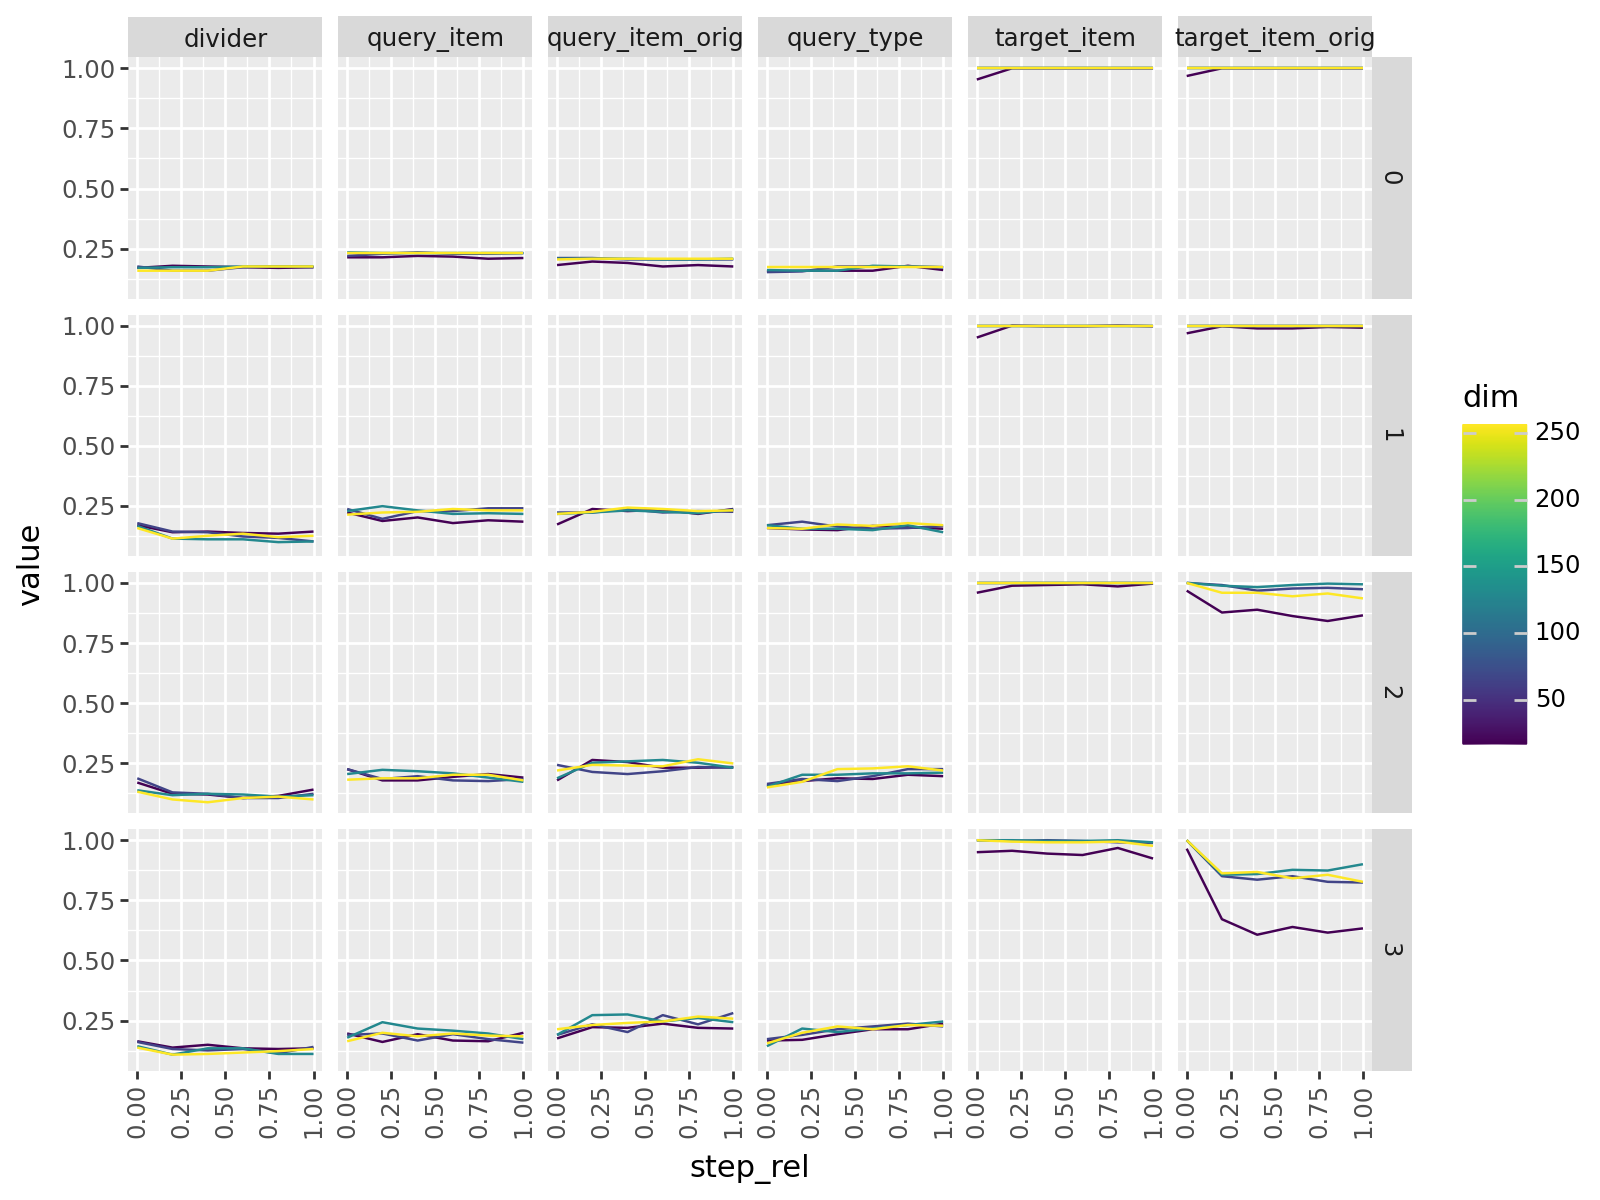

In [46]:
plot = (
    p9.ggplot(df_temp[df_temp["variable"].str.contains("SIBLING")], p9.aes(x="step_rel", y="value", color="dim", group="dim")) +
    p9.geom_line() +
    p9.facet_grid("layer~query") +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5), figure_size=(8, 6))
)
plot.show()